Bank Churn Analysis

# 1. Imports

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Load Dataset**

In [2]:
# Load dataset into a dataframe
df = pd.read_csv('data\churn_data.csv')

# Display first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Data Discovery

In [3]:
# How large is the dataset
df.size

140000

In [4]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Dataset contains 14 features and 10000 rows, totaling to 140,000 values. 
- Each row represents a bank customer while the columns store the customer's bank information
- There are 7 Numeric variables: RowNumber, CustomerId ,CreditScore, Age, Tenure, Balance, EstimatedSalary   
- There are 7 categorical variables: Surname, Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember, Exited. 

**Drop variables**
- The `CustomerId` and `Surname` variable has sensitive customer data and should be removed to maintain confidentally. 
- `Gender` should also be removed as it would be discrimatory to offer promotions based on gender.
- `RowNumber` can also be removed has it is just a counter. 

In [5]:
df = df.drop(['CustomerId','Surname','RowNumber','Gender'],axis=1)
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


**Quick Stats**

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- `Credit Score` ranges from 350 - 850 with a slight skew to the left
- Customers `age` ranges from 18 - 92 and averages around 38 years old. 
- On average, customers `tenure` is around 5 years 
- On average, the customers' account `balance` ranges from $0 to $250K.
- Customers' `estimated salary` ranges from $11.58 to $199K

# 3. Data Cleaning

**Check for missing values**

In [7]:
print('Missing values per column:')
df.isna().sum()

Missing values per column:


CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the dataset.

**Check for duplicates**

In [8]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

df_row = len(df)
df_row_no_dupe = len(df.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (10000, 10)
Shape of dataframe with duplicates dropped: (10000, 10)
No. of rows with duplicates : 0


**Check for outliers**

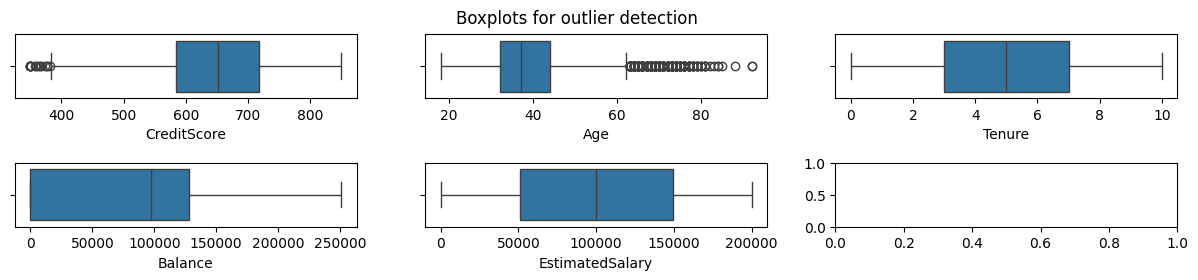

In [9]:
# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df['CreditScore'])
sns.boxplot(ax=axes[0,1], x=df['Age'])
sns.boxplot(ax=axes[0,2], x=df['Tenure'])

# add spacing between the rows
plt.subplots_adjust(hspace=1) 

sns.boxplot(ax=axes[1,0], x=df['Balance'])
sns.boxplot(ax=axes[1,1], x=df['EstimatedSalary'])
sns.boxplot(ax=axes[1,2])
plt.show();

In [10]:
# Separate numerical avariables into different df
num_cols = ['CreditScore','Age']

# Loop to cycle through numerical columns and create IQR for each column
for col in num_cols:
    print(col) #Print column name
    percentile25 = df[col].quantile(0.25) # Compute the 25th percentile value 
    percentile75 = df[col].quantile(0.75) # Compute the 75th percentile value   
    iqr = percentile75 - percentile25 # Compute the interquartile range
    
    # Define the upper limit and lower limit for non-outlier values in ``
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('LL:', lower_limit, '|', 'UL:', upper_limit)

    # Identify subset of data containing outliers
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]

    # Count how many rows in the data contain outliers 
    print('Rows of outliers :', len(outliers))
    print('')

CreditScore
LL: 383.0 | UL: 919.0
Rows of outliers : 15

Age
LL: 14.0 | UL: 62.0
Rows of outliers : 359



- Outliers are detected for CreditScore and Age features. 
- There are 15 customers with credit scores under 383. 
- Age has the 359 rows of outliers for customers over the age of 62.
- We'll circle back on how to deal with these. 

# Variable Analysis

### Target Variable = `Exited`

**Check Class Imbalance**

In [11]:
# Get percentage of distinct values
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

Out of 10,000 customers, a little over 2,000 (20.37%) have churned. This means that the bank retains a bit less than 80% of its customers.

While a perfect 50-50 split between churning and retained customers is ideal, an 80-20 split is still considered workable for analysis. This suggests that there's a good base of loyal customers to build on and target for further growth.

### CreditScore

Text(0.5, 1.0, 'Histogram')

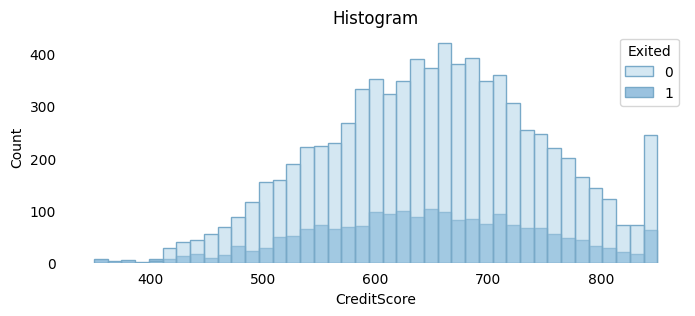

In [12]:
# Plot Histogram
fig = plt.figure(figsize=(8,3))
ax = sns.histplot(x=df['CreditScore'], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

- CreditScore has a relatively normal distribution, with mean around a score of 651. 
- Around 200+ customers achieved perfect credit score of 850


According to FICO, Credit Score rating as categorized as follows
- Very poor: 300 to 579
- Fair: 580 to 669
- Good: 670 to 739
- Very good: 740 to 799
- Excellent: 800 to 850

Create a new variable `CreditRating` to assign each CreditScore to a rating

#### CreditRating

In [13]:
# Create a new 'CreditRating' variable and assign based FICO ranges
df['CreditRating'] = np.select(
    [df['CreditScore'] <=579,
     df['CreditScore'].between(580, 669),
     df['CreditScore'].between(670, 739),
     df['CreditScore'].between(740, 799),
     df['CreditScore'].between(800, 859)],
    ['Very Poor', 'Fair', 'Good', 'Very Good','Excellent']
    )

df[['CreditScore','CreditRating']].head()

,CreditScore,CreditRating
0,619,Fair
1,608,Fair
2,502,Very Poor
3,699,Good
4,850,Excellent


**Plot CreditRating vs Exited**

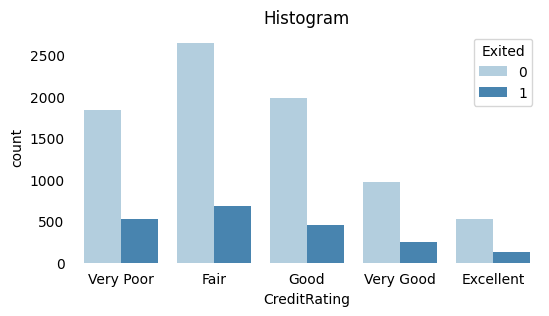

In [14]:
# Set figure size
fig = plt.figure(figsize=(6,3)) 

ax = sns.countplot(x=df['CreditRating'], order=['Very Poor', 'Fair', 'Good', 'Very Good','Excellent'], hue=df['Exited'],palette="Blues")
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Plot title
plt.title('Histogram') 
None

- The highest number of churned customers falls within the "Fair" credit rating category, with approximately 2646 customers.
- Customers with "Very Poor" credit scores also show a significant churn rate, with roughly 520 customers leaving the company.
- The number of churned customers drops for customers with higher credit ratings
- Very Good has around 252 churned customers.
- Excellent has the lowest churn with approximately 128 customers leaving.

Let's calculate the churn rate for each rating based on the total count per group


In [15]:
# Calculate churn rate
ratings = df['CreditRating'].unique().tolist()

for rating in ratings:
    count = df[(df['CreditRating'] == rating)].shape[0]
    Exited_count = df[(df['CreditRating'] == rating) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {rating} {percent_Exited:.1f}%')


Percent Exited in Fair 20.6%
Percent Exited in Very Poor 22.0%
Percent Exited in Good 18.6%
Percent Exited in Excellent 19.5%
Percent Exited in Very Good 20.6%


- Surprisingly, credit rating does not have a clear correlation with churn rate.
- Although, customers with a Fair credit rating churned the most, it's 20.6% churn rate is very close to all those for other ratings.
- Even the highest credit rating, Excellent, has a churn rate of 19.5%.
- This suggests that customers with good credit scores are just as likely to churn as those with poor credit scores.

## HasCrCard

In [16]:
# Separate numerical and categorical variables into different df
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

70% of the customers have a credit card

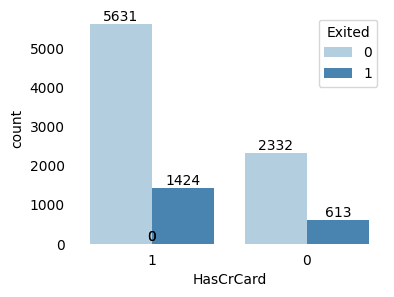

In [17]:
fig = plt.figure(figsize=(4,3))
ax = sns.countplot(x=df['HasCrCard'], order=df['HasCrCard'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')



The number of customers with a credit card and churned is doubled that of customers without a credit card. 

Lets calculate churn rate for customers with and without credit cards

In [18]:
# Get unique HasCrCard values and save as list
cards = df['HasCrCard'].unique().tolist()

# loop through list and calculate churn rate
for card in cards:
    count = df[(df['HasCrCard'] == card)].shape[0]
    Exited_count = df[(df['HasCrCard'] == card) & (df['Exited'] == 1)].shape[0]
    Percent_Exited = (Exited_count/count) * 100
    print(f' When customer HasCrCard = {card}, {Exited_count} left out of {count}, therefore % Exited = {Percent_Exited:.1f}%')


 When customer HasCrCard = 1, 1424 left out of 7055, therefore % Exited = 20.2%
 When customer HasCrCard = 0, 613 left out of 2945, therefore % Exited = 20.8%


- The data reveals a surprising finding about customer churn ("Exited") in relation to credit card ownership.
- Both customer groups with and without credit cards have very similar churn rates.
- Among customers who have a credit card (7,055), 1,424 churned, resulting in a churn rate of approximately 20.2%.
- Similarly, for customers who don't have a credit card (2,945), 613 churned, representing a churn rate of around 20.8%.
- It's unexpected that credit card ownership doesn't have a clearer impact on churn.
- While the churn rates are slightly different, the difference is minimal.

## Age

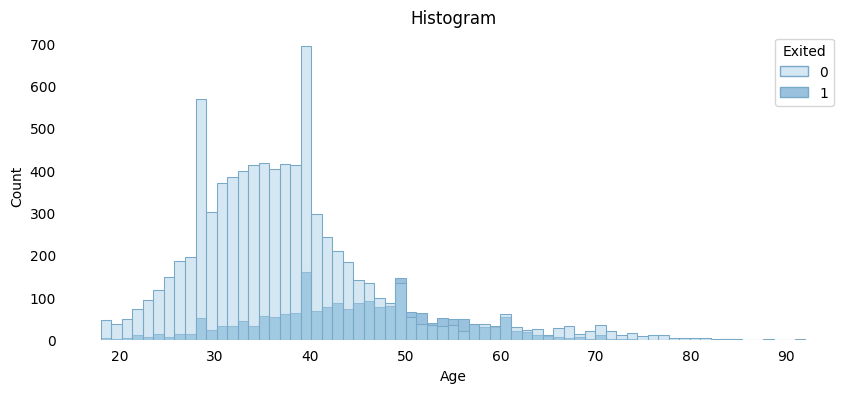

In [19]:
# Plot Histogram
fig = plt.figure(figsize=(10,4))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8',kde)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
None

C:\Users\tunhi\AppData\Local\Temp\ipykernel_24296\2303560488.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(x=df['Age'], palette='acadia', edgecolor='#78a9c8')


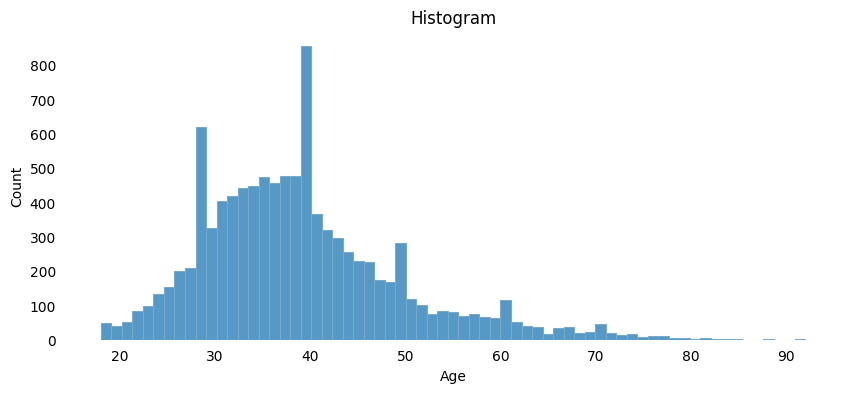

In [49]:
# Plot Histogram
fig = plt.figure(figsize=(10,4))
ax = sns.histplot(x=df['Age'], edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
None

- the distribution of customers' age is right skewed with more younger customers.
- Younger customers around 30-40 years old are more likely to stay.

**Replot by grouping age into bins** for cleaner visualization

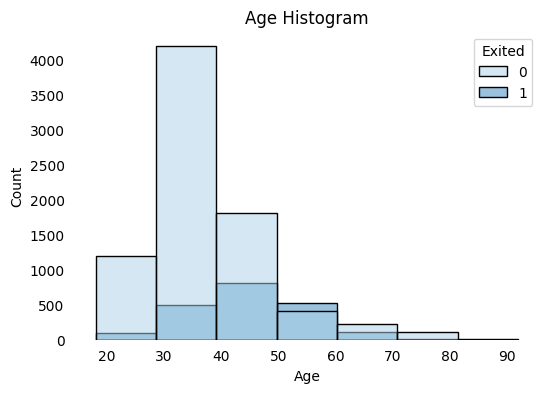

In [20]:
# Plot Histogram
fig = plt.figure(figsize=(6,4))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues', binwidth=10)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Age Histogram')

None

- While 30-40 year olds make up the largest age group,
- The highest number of exits (around 700) came from the 40-50 age bracket.
- This suggests a higher churn rate for customers over 40 compared to those under 40.

Let's look at Balance by Age 

In [21]:
# create interval range 
interval_range = pd.interval_range(start=10, freq=10, end=100)

#create a new column applying the bins
df['AgeBins'] = pd.cut(df['Age'], bins=interval_range, labels=[1,2,3])

#show original and new column with bins
df[['Age','AgeBins']].head()

,Age,AgeBins
0,42,"(40, 50]"
1,41,"(40, 50]"
2,42,"(40, 50]"
3,39,"(30, 40]"
4,43,"(40, 50]"


### Age Vs Balance

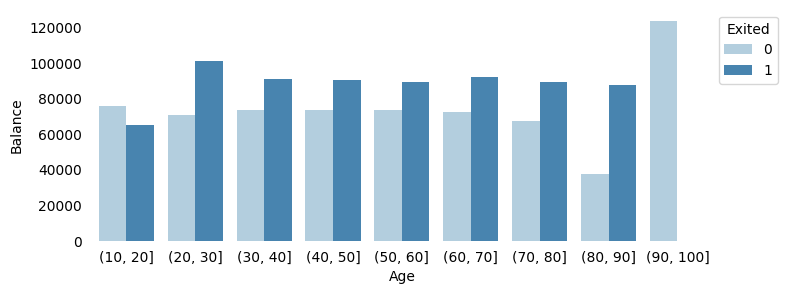

In [22]:
fig = plt.figure(figsize=(8,3))
ax = sns.barplot(x=df['AgeBins'], y=df['Balance'], hue=df['Exited'], palette='Blues', errorbar=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.xlabel("Age")
None

- Customers under 90 who remained had an average balance under $80,000.
- Conversely, customers under 90 with balances exceeding $90,000 have exited.
- Do benefits decrease after reaching $90,000 in accumulated balance?

Let's calculate that mean balance for customers who has left.

In [23]:
# Calculate the mean
print('Average Balance:')
print('')
print( df.groupby('Exited')['Balance'].mean())
print('')

# Calculate the total balance and print
print('Total Balance:')
print('')
print(df.groupby('Exited')['Balance'].sum())

Average Balance:

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

Total Balance:

Exited
0    5.792708e+08
1    1.855881e+08
Name: Balance, dtype: float64


- On average, customers who left the bank, took with them around $91K in balance. 
- In total, the customers who left took ~185M with them!
- This is a significant loss for the bank.

## Balance

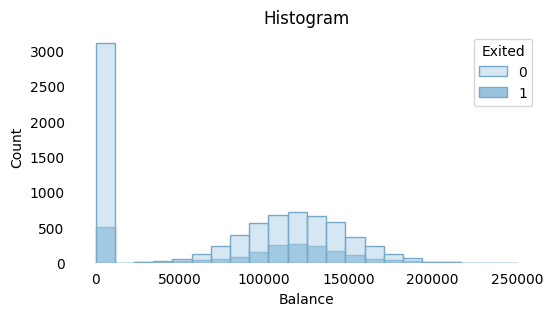

In [24]:
# Plot Histogram
fig = plt.figure(figsize=(6,3
                          ))
ax = sns.histplot(x=df['Balance'], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
None

- Over 3500 customers or 35% of the customers have 0 balance. 
- If these customers are excluded, the balance data would follow a normal distribution
- What would cause customers to have bank account with no balance? Are they transferring money out of their account in preparation to exit? 
- Let's take a deeper dive into customers with 0 balance.

**Filter customers with zero Balance**

In [25]:
# Create a Boolean mask 
mask = (df['Balance'] == 0)   
df_mask = df[mask]
df_mask.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
3,699,France,39,1,0.0,2,0,0,93826.63,0,Good,"(30, 40]"
6,822,France,50,7,0.0,2,1,1,10062.80,0,Excellent,"(40, 50]"
11,497,Spain,24,3,0.0,2,1,0,76390.01,0,Very Poor,"(20, 30]"
12,476,France,34,10,0.0,2,1,0,26260.98,0,Very Poor,"(30, 40]"


**Plot**

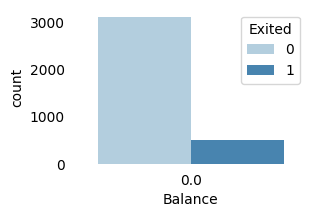

In [26]:
fig = plt.figure(figsize=(3,2))
ax = sns.countplot(x=df_mask['Balance'], hue=df_mask['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders


- A significant portion (over 3,500 or 35%) of customers have zero balance.
- Interestingly, a quarter (around 500) of those with zero balance have exited.
- Notably, this represents a large portion (around 25%) of all exiting customers (2,037), suggesting a potential link between zero balance and customer churn.

**Create another mask for customers with 0 balance and have Exited**

In [27]:
# Create a Boolean mask 
mask = (df['Balance'] == 0) &  (df['Exited'] == 1)
df_mask_churn = df[mask]
df_mask_churn.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
22,510,Spain,38,4,0.0,1,1,0,118913.53,1,Very Poor,"(30, 40]"
30,591,Spain,39,3,0.0,3,1,0,140469.38,1,Fair,"(30, 40]"
58,511,Spain,66,4,0.0,1,1,0,1643.11,1,Very Poor,"(60, 70]"
81,777,France,32,2,0.0,1,1,0,136458.19,1,Very Good,"(30, 40]"


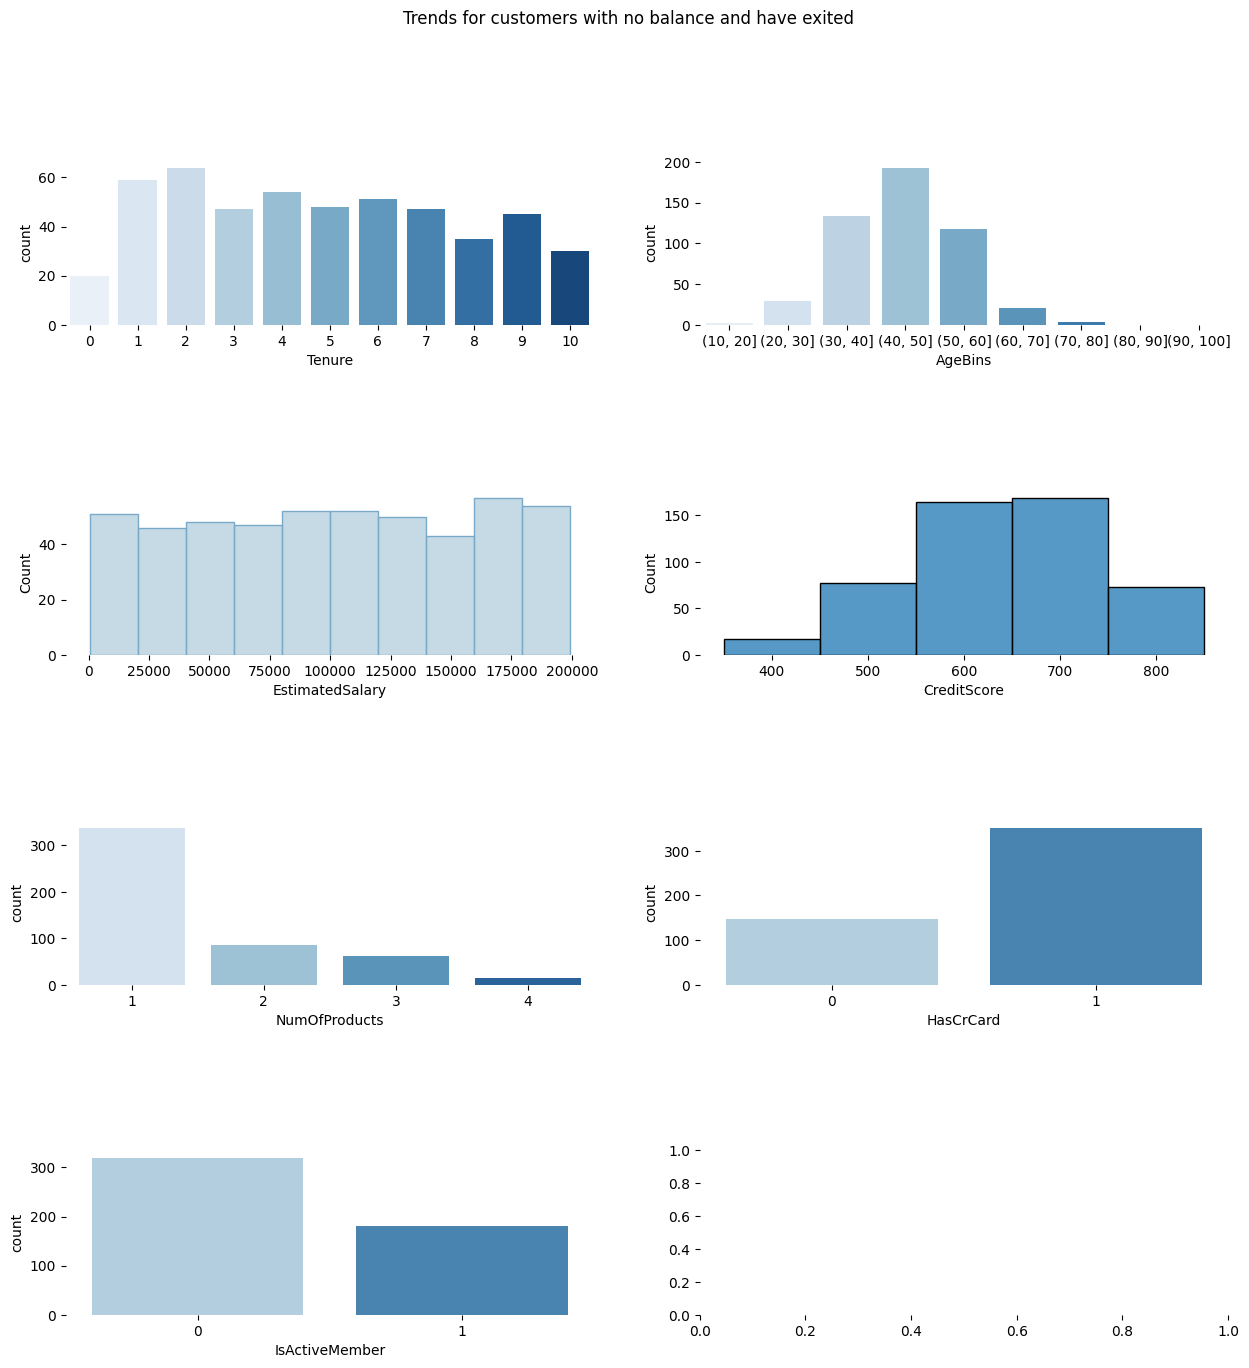

In [28]:
# create 4 row x 2 column figure
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Trends for customers with no balance and have exited')
sns.countplot(ax=axes[0,0], x=df_mask_churn['Tenure'], palette='Blues')
sns.countplot(ax=axes[0,1], x=df_mask_churn['AgeBins'], palette='Blues')
sns.histplot(ax=axes[1,0], x=df_mask_churn['EstimatedSalary'], color='#b3cede', edgecolor='#78a9c8')
sns.histplot(ax=axes[1,1], x=df_mask_churn['CreditScore'], binwidth=100)
sns.countplot(ax=axes[2,0], x=df_mask_churn['NumOfProducts'], palette='Blues')
sns.countplot(ax=axes[2,1], x=df_mask_churn['HasCrCard'], palette='Blues')
sns.countplot(ax=axes[3,0], x=df_mask_churn['IsActiveMember'], palette='Blues')


# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True) 

# add spacing between the rows
plt.subplots_adjust(hspace=1)

plt.show();

Here's a breakdown of the 500 customers who exited with zero balance:
- Short Tenure: Roughly 28% (around 140) left within the first two years of opening their account. This suggests they might not have found the value they were looking for early on.
- Millennial Focus: Around 40% (around 200) were between 30 and 40 years old. This age group may have different banking needs or priorities compared to other demographics.
- Limited Engagement: Over 60% (more than 300) only had one product with the bank. This indicates they might not have been fully utilizing the bank's offerings.
- Credit Card Users: More than 60% (more than 300) had a credit card. This doesn't necessarily explain their exit, but it could be a factor to consider.
- Inactive Accounts: Over 60% (more than 300) were not actively using their account. This inactivity could be a reason for the account closure or a sign of dissatisfaction.

## IsActiveMember


In [29]:
# Separate numerical and categorical variables into different df
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Little more than half of the customers (5151) are active and the rest (4849) are inactive

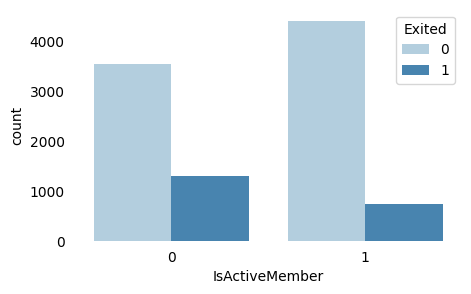

In [30]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['IsActiveMember'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

In [31]:
# Calculate churn rate
activeness = df['IsActiveMember'].unique().tolist()

for active in activeness:
    count = df[(df['IsActiveMember'] == active)].shape[0]
    Exited_count = df[(df['IsActiveMember'] == active) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f" When customer's activeness = {active}, the % Exited = {percent_Exited:.1f}%" )


 When customer's activeness = 1, the % Exited = 14.3%
 When customer's activeness = 0, the % Exited = 26.9%


- Active customers churn at a rate of 14.3%.
- Inactive customers churn at a rate of 26.9%. This is 12.6 percentage points higher than the churn rate for active customers. In other words, inactive customers are 12.6% more likely to churn than active customers.

## NumOfProducts

In [32]:
# Check unique values
df['NumOfProducts'].value_counts(normalize=True)*100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

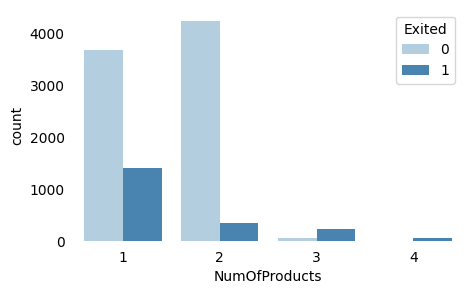

In [33]:
# Plot
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['NumOfProducts'], order=df['NumOfProducts'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

In [34]:
# Calculate churn rate
products = df['NumOfProducts'].sort_values(ascending=True).unique().tolist()

for product in products:
    count = df[(df['NumOfProducts'] == product)].shape[0]
    Exited_count = df[(df['NumOfProducts'] == product) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f" When customer has {product} product, % Exited = {percent_Exited:.1f}%" )


 When customer has 1 product, % Exited = 27.7%
 When customer has 2 product, % Exited = 7.6%
 When customer has 3 product, % Exited = 82.7%
 When customer has 4 product, % Exited = 100.0%


- Customers can have up to 4 products 
- The data shows a clear connection between the number of products a customer holds and their likelihood of churning.
- Most Common, Most Churn: Over half (50.84%) of customers have only 1 product, and this group also has the highest number of churned customers (1409). This suggests they might not be finding enough value in the single product to justify staying.
- Sweet Spot: Customers with 2 products (45.9% of the base) have the lowest churn rate (7.6% or 348 customers). This indicates that having a couple of products increases engagement and loyalty.
- High Risk, High Churn: Customers with 3 or 4 products (a combined 3.26% of the base) have a very high churn rate (82.7% or all churned for 4 products). This suggests these customers might be overwhelmed by too many options or have niche needs not being met.
- These findings suggest that offering the right bundle of products can significantly impact customer retention.
- It might be beneficial to explore why customers with 3 or 4 products churn and tailor product recommendations for those with only 1 product.
       

## Geography

In [35]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

- The customer base comes from three European countries: France, Germany, and Spain. 
- France holds the majority with 5,014 customers, making up over half of the total.
- The remaining customers are distributed relatively evenly between Germany (2,509) and Spain (2,477).

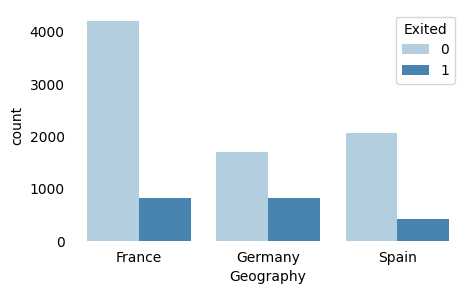

In [36]:
# Plot histogram
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['Geography'], order=df['Geography'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

In [37]:
# Calculate churn rate for each country
countries = df['Geography'].unique().tolist()

for country in countries:
    count = df[(df['Geography'] == country)].shape[0]
    Exited_count = df[(df['Geography'] == country) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {country} {percent_Exited:.1f}%')


Percent Exited in France 16.2%
Percent Exited in Spain 16.7%
Percent Exited in Germany 32.4%


- Germany and France has similar number of customers churns but interestingly, churn rates vary across these regions.
- Germany has the highest churn rate at 32.4%
- France and Spain experience churn rates around 16.2% and 16.7% respectively.

Let's check customer balance for each country to gain additional insight

## Geography vs Balance

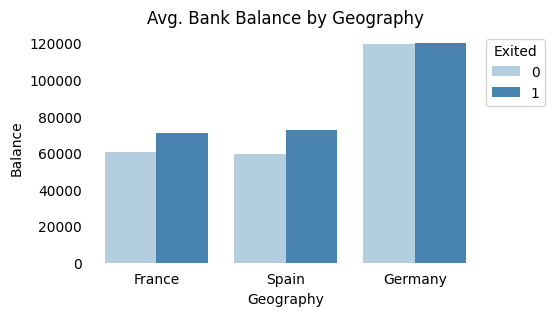

In [38]:
fig = plt.figure(figsize=(5,3))

# Creat bar graph
plt.title('Avg. Bank Balance by Geography', fontsize='12', loc="center")
ax = sns.barplot(x=df['Geography'], y=df['Balance'], hue=df['Exited'], palette='Blues', errorbar=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location
sns.despine(left=True, bottom=True) # Remove borders
ax.tick_params(left=False, bottom=False) # Remove ticks




- Customers who churned in France and Spain took an average balance of $71,000 and $73,000, respectively.
- However, in Germany, churned customers took an average of nearly twice that amount, at $120,000. This suggests that German churned customers are leaving with a significantly higher balance compared to France and Spain.
- It's also worth noting that Germany has the highest churn rate at 32%, compared to France (16.2%) and Spain (16.7%).
- This could indicate that Germany is losing a higher proportion of customers with larger balances.
- Further investigation into the reasons behind churn in Germany might be beneficial to mitigate customer losses and the associated revenue impact.

Let's look at the distribution of customers balance across these countries.

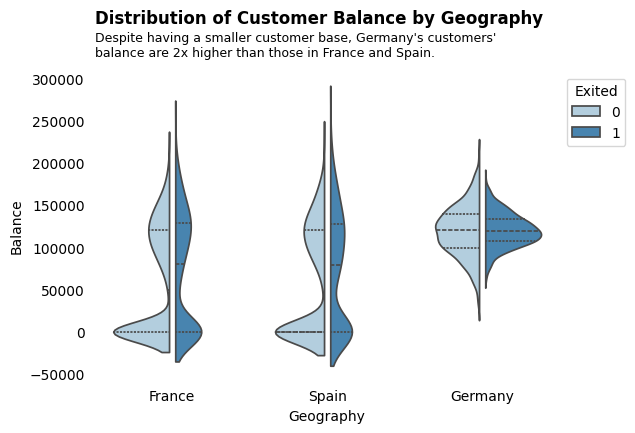

In [39]:
# Create violinplot showing distributions bank balance by geography


fig = plt.figure(figsize=(6,4))             # Set figure size
plt.title('Distribution of Customer Balance by Geography', fontsize='12', loc="left", fontweight="bold",pad=35)

# Add caption below the title
plt.text(0, 1.05, "Despite having a smaller customer base, Germany's customers'\nbalance are 2x higher than those in France and Spain. ", fontsize='9', transform=plt.gca().transAxes, ha="left")


ax = sns.violinplot(data=df,                # violin plot
                    x='Geography',
                    y='Balance', 
                    hue='Exited', 
                    palette='Blues', 
                    split="True", 
                    inner='quart', 
                    gap=0.1)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))        # Add legend
sns.despine(left=True, bottom=True)         # Remove borders 
ax.tick_params(left=False, bottom=False)    # Remove ticks
plt.show()                                  # Show Plot


- France and Spain: Around half of the customers in these countries maintain zero balances. 
    - Among those with balances (likely the more profitable customers), the churn rate is around 16% and they take an average of $71,000 - $73,000 with them when they churn.
- Germany: While Germany has a smaller overall customer base, its churn rate is significantly higher at 32.4%. 
    - Interestingly, German customers who churn tend to have much higher average balances of around $120,000. 
    - This means that despite having fewer customers, Germany experiences higher losses per churned customer due to these larger balances.

Focus on Germany: These findings highlight the importance of prioritizing improvements in Germany's customer service or product offerings. By addressing the reasons behind churn in Germany, the bank can potentially retain more high-value customers and mitigate significant revenue losses.

## Estimated Salary

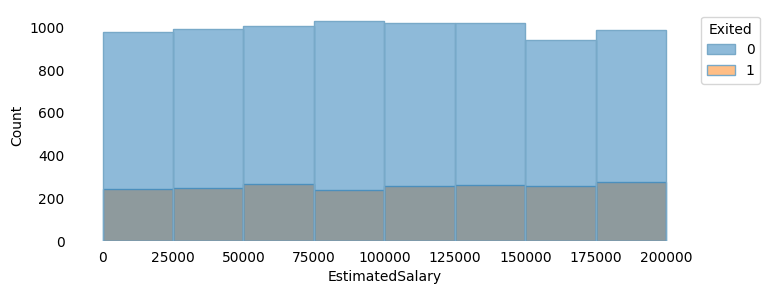

In [40]:
fig = plt.figure(figsize=(8,3))
ax = sns.histplot(x=df['EstimatedSalary'], hue=df['Exited'], binwidth=25000, color='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location


- The salary range seems to be evenly spread across the customer base ("uniform distribution"). This means there aren't any specific salary brackets with a higher concentration of customers.
- Regardless of salary range, approximately 25% of customers churn (around 250 customers). This suggests that churn might be driven by factors other than salary.


## Tenure

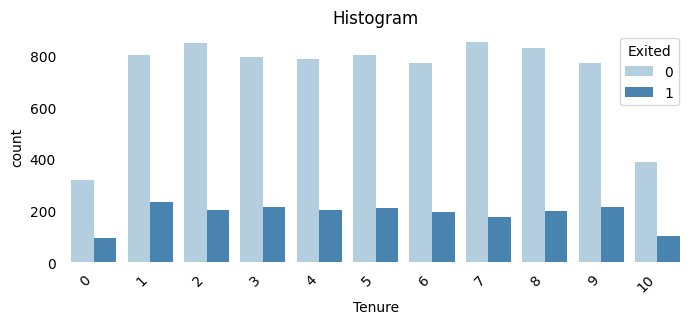

In [41]:
# Plot Histogram
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x=df['Tenure'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- Tenure seems to be evenly distributed across the customer base ("uniform distribution"). Interestingly, the number of customer churns stays relatively consistent at around 200 people every year, except for the first and tenth years.
- Unlike other years, both year 1 and year 10 have a lower churn rate, with only around 100 customers churning in each of these years.

To understand the reasons behind the lower churn rates in year 1 and year 10, it would be beneficial to:

- Year 1 Retention: Investigate what the bank might be doing well to retain customers in the first year. It could be strong onboarding processes, competitive introductory offers, or meeting the initial needs of new customers effectively.
- Year 10 Loyalty: Explore why customers reach a decade with the bank and why they churn at a lower rate then. Possible explanations include established loyalty programs, inertia (less likely to switch after a long tenure), or the bank effectively catering to the needs of long-term customers.

# Feature Engineering